In [1]:
import numpy as np                 # for handling large arrays
import pandas as pd                # for data manipulation and analysis
import sklearn                     # a machine learning library
import os                          # for accessing local files
import IPython.display as ipd
import librosa.display             # librosa plot functions
import matplotlib.pyplot as plt    # plotting with Matlab functionality
import librosa

In [2]:
df = pd.DataFrame(columns = ['RSME', 'ZCR'])
df

,RSME,ZCR


In [3]:
BASE_FOLDER = "/Users/Praveena Acharya/Desktop/Audio Spectral Analysis/Audio Data"
sound_file = "Sargam2.wav"

In [4]:
ipd.Audio(os.path.join(BASE_FOLDER, sound_file))

In [5]:
# load sounds
voice, sr = librosa.load(os.path.join(BASE_FOLDER, sound_file))

Text(0.5, 1.0, 'Time Domain')

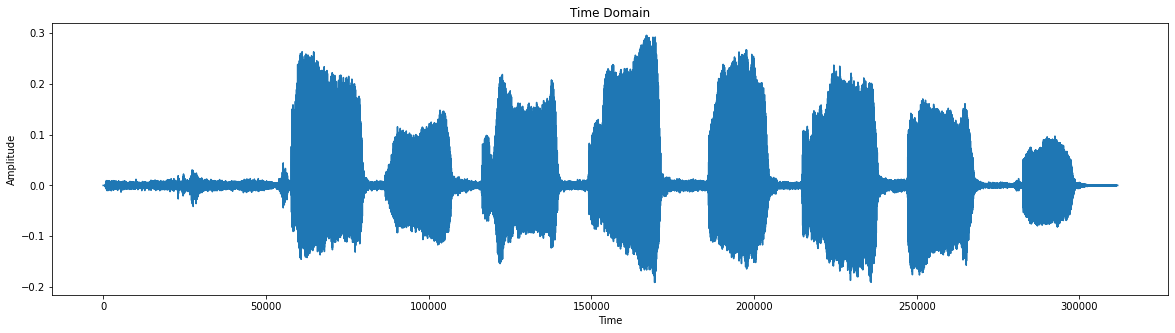

In [6]:
# Time Domain
plt.figure(figsize=(20,5))
plt.plot(voice)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Time Domain')

In [7]:
frame_length = 1024
hop_length = 512

In [8]:
features = []

## 1. Root-mean-squared energy

In [9]:
# compute RMSE over frames
rmse = librosa.feature.rms(voice, frame_length=frame_length, hop_length=hop_length, center=True)[0]

In [10]:
rmse

array([0.00000000e+00, 1.73530984e-03, 3.11419694e-03, 3.72342113e-03,
       3.78385116e-03, 3.60824051e-03, 3.51256481e-03, 3.33322049e-03,
       2.98739458e-03, 3.06711835e-03, 3.21652903e-03, 2.90628010e-03,
       2.89284042e-03, 3.04613030e-03, 2.73988326e-03, 2.55579315e-03,
       2.73790304e-03, 2.86693475e-03, 2.72183237e-03, 2.75604520e-03,
       2.73090578e-03, 2.46771681e-03, 2.40280246e-03, 2.58899061e-03,
       2.67982646e-03, 2.69010523e-03, 2.50341976e-03, 2.49849609e-03,
       3.02440929e-03, 3.16105946e-03, 3.02814343e-03, 3.22819385e-03,
       3.34608788e-03, 3.40310577e-03, 3.36149288e-03, 3.06474301e-03,
       3.03605595e-03, 3.24085215e-03, 3.51096410e-03, 3.55615676e-03,
       3.61503079e-03, 3.66712292e-03, 3.70646594e-03, 3.56094516e-03,
       3.23988684e-03, 4.94560366e-03, 5.03498456e-03, 4.87470720e-03,
       7.20206881e-03, 6.61148503e-03, 4.10703663e-03, 3.92064871e-03,
       5.56792924e-03, 1.17480559e-02, 1.39277028e-02, 1.29912999e-02,
      

In [11]:
mean_rmse = np.mean(rmse)
print(mean_rmse)

0.03836367


In [12]:
features.append(mean_rmse)

In [13]:
rmse.shape

(609,)

In [14]:
frames = range(len(rmse))
t = librosa.frames_to_time(frames, sr=sr, hop_length=hop_length)

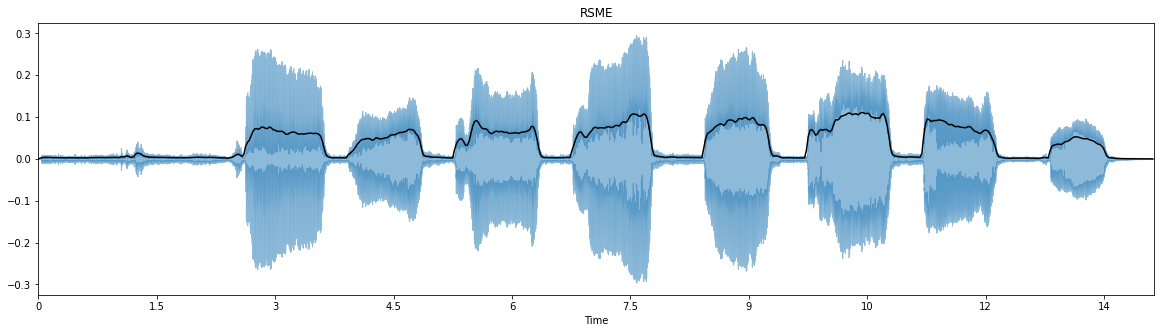

In [15]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(voice, alpha=0.5)
plt.plot(t, rmse, color="black")
plt.title("RSME")
plt.show()

## 2. Zero-crossing rate with Librosa

In [16]:
zcr = librosa.feature.zero_crossing_rate(voice, frame_length=frame_length, hop_length=hop_length, center=True)[0]
zcr.size

609

In [17]:
mean_zcr = np.mean(zcr)
print(mean_zcr)

0.07831261545566502


In [18]:
features.append(mean_zcr)

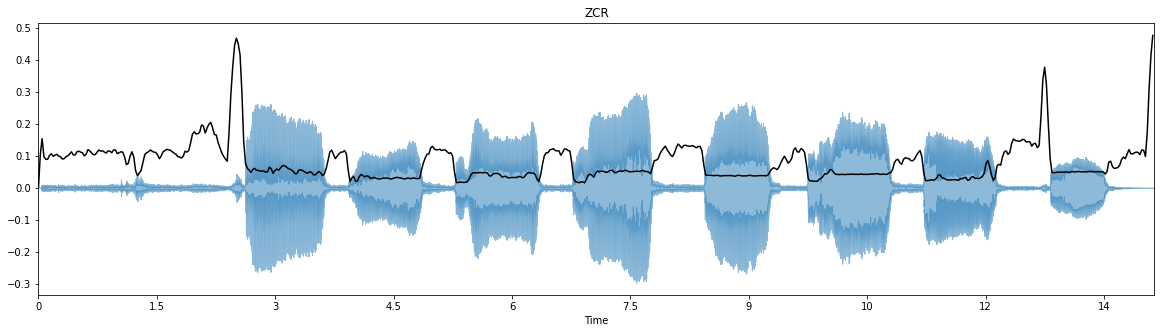

In [19]:
plt.figure(figsize=(20, 5))
librosa.display.waveplot(voice, alpha=0.5)
plt.plot(t, zcr, color="black")
plt.title("ZCR")
plt.show()

In [20]:
features

[0.03836367, 0.07831261545566502]

In [21]:
df.loc[len(df)] = features

In [22]:
df

,RSME,ZCR
0,0.038364,0.078313
